# 이미지 분할
- image sementation(이미지분할)은 이미지를 여러개로 분할하는 것(색상분할)
- semantic segmentation(시맨틱 분할)은 동일 종류의 물체에 속한 픽셀을 같은 세그먼트로 할당
- 시맨틱 분할에서 최고의 성능을 내기 위해선 CNN 기반(딥러닝)
- 지금은 단순 색상분할로 시도

### 이미지 불러오기

In [1]:
from matplotlib.image import imread

image = imread('./ladybug.png')
image.shape

(172, 246, 4)

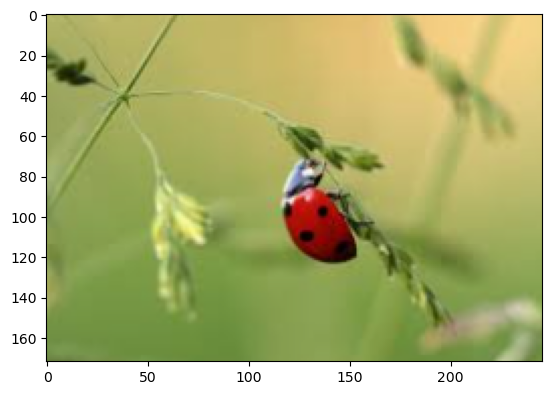

In [2]:
import matplotlib.pyplot as plt

plt.imshow(image);

### 색상별 클러스터링

In [3]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=13).fit(X)   # n_clusters=8 : RGB를 각각 8등분(색상을 8등분)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]   # segmented_img 에 중심값의 label값만 저장
segmented_img = segmented_img.reshape(image.shape)

- KMeans(n_clusters=8, random_state=13).fit(X) : n_clusters=8 : RGB를 각각 8등분(색상을 8등분)
- kmeans.cluster_centers_[kmeans.labels_] : segmented_img 에 중심값(cluster_centers_)의 label값만 저장

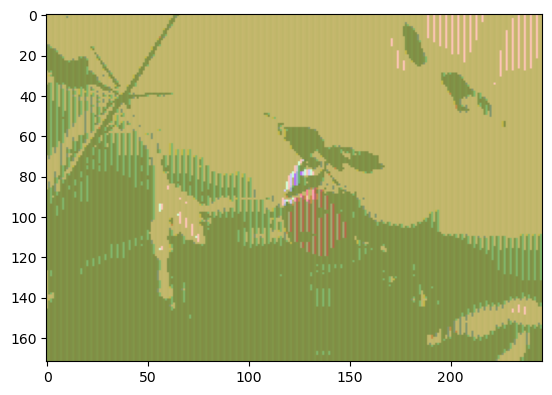

In [5]:
plt.imshow(segmented_img);

- 원본 사진에서 가장 많이 사용된 색상 8개를 추출하여 그 8개 색으로만 다시 그린 그림
- 결과는 색상의 종류가 단순하게 된다.

### 여러 군집을 비교

In [10]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2) # 10, 8, 6, 4, 2 개의 색상으로 군집화 해보기

for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] 
    segmented_imgs.append(segmented_img.reshape(image.shape))

### 결과 시각화

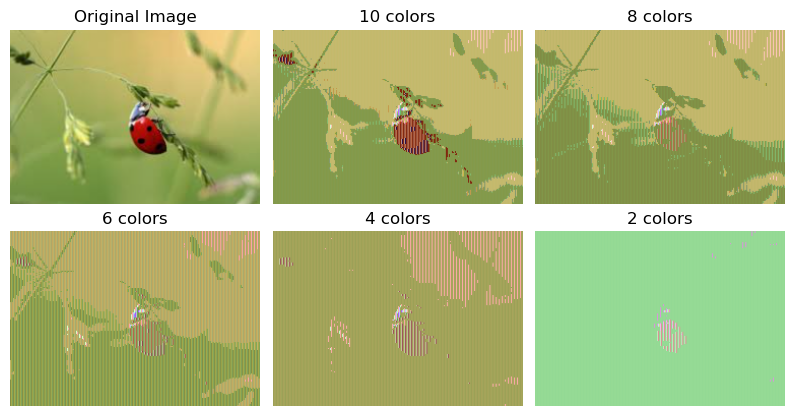

In [13]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
    
    
plt.show()

---
# MNIST 데이터

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [15]:
X_digits, y_digits = load_digits(return_X_y=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=13)

### 로지스틱 회귀

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=13)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=13)

- multi_class='ovr' : 다중 분류 (분류 개수가 3개 이상)
- solver='lbfgs' : 데이터가 많아서

In [19]:
log_reg.score(X_test, y_test)

0.9622222222222222

- 테스트 셋에서 정확성이 96% ! 나쁘지않다.

### Pipeline - kmeans & LogisticRegression

In [20]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline([("kmeans", KMeans(n_clusters=50, random_state=13)),
                ("lod_reg", LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=13))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=13)),
                ('lod_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=13))])

In [28]:
pipe.score(X_test, y_test)

0.9688888888888889

- 매우 미세하게 상승!

### Gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = dict(kmeans__n_clusters=range(2, 100))

grid_clf = GridSearchCV(pipe, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.2s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.1s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=70; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=71; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=73; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=73; total time=   4.6s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=13)),
                                       ('lod_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=13))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [31]:
grid_clf.best_params_

{'kmeans__n_clusters': 82}

- 82개일때 가장 좋다.

In [32]:
grid_clf.score(X_test, y_test)

0.9755555555555555

- 좀 더 상승@!